# 1차원 데이터

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('./data/ch2_scores_em.csv',index_col='student number') #.이 하나면 같은 폴더 ..면 상위폴더
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [2]:
scores=np.array(df.english)[:10] #'english'열의 값을 가져와서 numpy array로 변환한 뒤 , 첫 10개의 값을 추출
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [3]:
scores_df=pd.DataFrame({'score':scores},index=list('ABCEDFGHIJ'))
#numpy array인 scores를 이용하여 pandas DataFrame 객체인 scores_df 생성
#{'score':scores} : 'score'라는 열에 'scores'배열의 값들을 저장
#index=list('ABCDEFGHIJ') : 인덱스를 A부터 J 까지의 알파벳으로 설정

scores_df.head()

,score
A,42
B,69
C,56
E,41
D,57


In [5]:
# 위와 같은 내용+인덱스 열에 이름 부여 
scores_df=pd.DataFrame({'score':scores},
                      index=pd.Index(list('ABCDEFGHIJ'),name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [6]:
#평균값 - 배열

#방법 1
print(sum(scores)/len(scores))
#리스트 내 모든수의 합계(sum)를 리스트 내 아이템 갯수(len)로 나누어 평균값 구하기.

#방법 2
print(np.mean(scores)) 
#numpy의 mean 함수를 이용하여 평균값 구하기

55.0
55.0


In [8]:
#평균값 - 데이터프레임

scores_df.mean()

#data frame의 각 열에대한 평균값을 반환하기 때문에, 반환되는 값은 Series 데이터 타입.
#이렇게 계산된 평균값을 이용하여 다양한 분석 및 시각화 작업을 할 수 있다.

score    55.0
dtype: float64

In [9]:
#중앙값 (중간값)

#배열 
print(np.median(scores))

#데이터프레임
print(scores_df.median())

#배열은 함수 먼저 쓰고 데이터 프레임은 함수가 뒤에 오네.
#그리고 배열은 값만 나오고 데이터 프레임은 타입도 볼 수 있구만. 

56.5
score    56.5
dtype: float64


<AxesSubplot:ylabel='Frequency'>

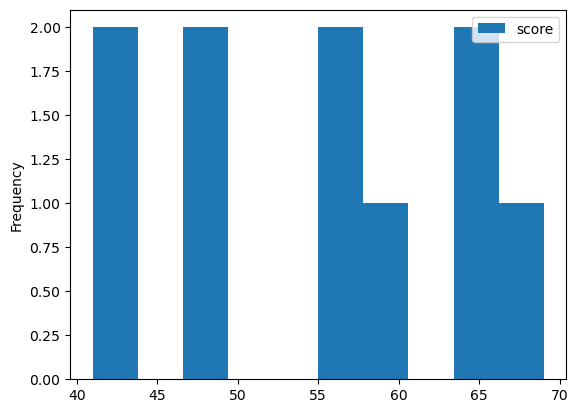

In [11]:
scores_df.plot(kind='hist')
#x축은 데이터 범위. y축은 해당 범위에 속한 데이터의 갯수

In [12]:
#정렬
sorted_scores=np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [13]:
#수동으로 중앙값 구하기 (값을 정렬한 후 리스트의 중간값 2개의 합 /2 )
(56+57)/2

56.5

In [16]:
# Q. 식으로 구하여라

#중앙값 계산 코드

n=len(sorted_scores) #sorted_scores 의 길이 (갯수)를 n에 저장

if n%2==0: #짝수. %=나머지를 구하는 식으로 a나누기 2의 나머지가 0인 경우(짝수) 찾기
    
    m0=sorted_scores[n//2-1] #중간 인덱스에서 1을 뺀 값을 m0에 저장 ★노이해
    m1=sorted_scores[n//2]  #인덱스 [n//2의 값을 m1에 저장
    
    #중간값을 구하기 위해서는 중간 인덱스를 구한 뒤
    median=(m0+m1)/2 #그 인덱스에 해당하는 두 값을 더한 후 2로 나눈다
    
    
else:
    median=sorted_scores[(n+1)//2-1]
    #(n+1)//2 는 중간 인덱스를 구하기 위한 계산식. 인덱스는 0부터 시작하므로 1을 더해준다.
    #그리고 2로 나누기 위해 // 연산자 사용.
median
    
    
#m0 에서 -1을 하는 이유: 인덱스가 0부터 시작하기 때문
#예를 들어, 만약 sorted_scores의 길이가 10이라면, 중간 인덱스는 4가 된다.
#따라서 중간값을 구하기 위해서는 1을 뺀 3번째 값과 4번째 값의 합을 2로 나눈다

56.5

In [17]:
#최빈값 : 빈도수가 가장 많은 것

scores_df.mode()

#mode(): 최빈값 구하는 메소드. => 가장 자주 등장하는 값을 계산하고 그 값을 반환해준다.
#최빈값이 여러개일 경우 모든 최빈값이 반환됨.

,score
0,65


In [19]:
pd.Series(sorted_scores).mode()

#시리즈로 바꿔서 할 수도 있다

0    65
dtype: int64

In [21]:
scores_df.describe() #통계 요약표

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


<AxesSubplot:xlabel='score', ylabel='Density'>

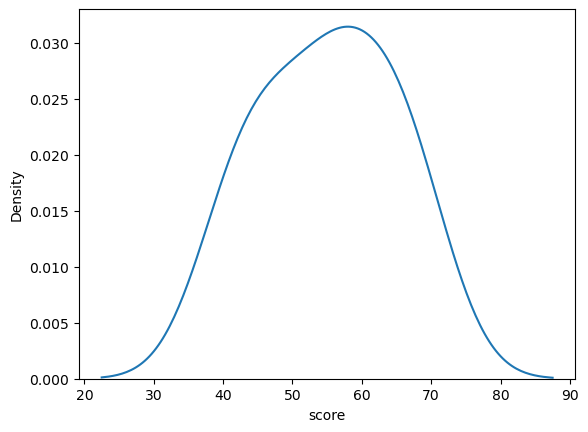

In [22]:
import seaborn as sns
sns.kdeplot(data=scores_df,x='score')

#kdfplot( 커널 밀도 추정 그래프) :  seaborn
#데이터셋의 확률 밀도 함수를 추정하는 데 사용. 데이터의 분포를 더욱 부드럽게 표현

#### 헷갈리는 어휘

<font color=blue>'데이터 분포가 치우친'</font>거랑 <font color=blue>'데이터값이 몰린'</font>거랑 의미가 다름.
- 꼬리가 오른쪽으로 길게 늘어져 있는건 -> 데이터 <font color=blue>분포</font>가 오른쪽으로 치우쳤다 
- 히스토그램에서 데이터들의 빈도(개수)가 앞쪽에 높게 돼 있는 건 -> 데이터<font color=blue>값</font>이 왼쪽으로 몰렸다

,score
count,10.000000
mean,79.200000
std,78.187524
min,41.000000
25%,48.250000
50%,56.500000
75%,65.000000
max,300.000000


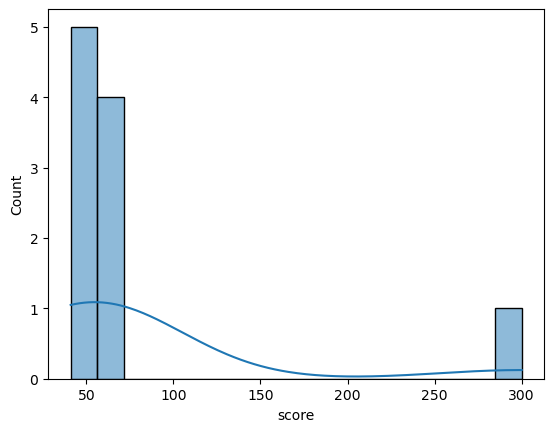

In [24]:
#평균값 > 중앙값

scores_df_b=scores_df.copy()
scores_df_b.iloc[9,0]=300  #마지막 행의 값으로 300을 만듦
sns.histplot(data=scores_df_b, x='score',kde=True) #score열을 x축으로 사용. kde(커널 밀도 추정 그래프)사용
scores_df_b.describe()

#극단적으로 큰 수가 있게 되면 평균이 중앙값보다 오른쪽에 있다.
#오른쪽으로 치우친 (skewed right) 분포는 작은 수가 왼쪽에 몰려있고 큰수가 우측으로 넓게 퍼져잇음


,score
count,10.000000
mean,49.300000
std,19.556471
min,1.000000
25%,43.500000
50%,52.500000
75%,63.000000
max,69.000000


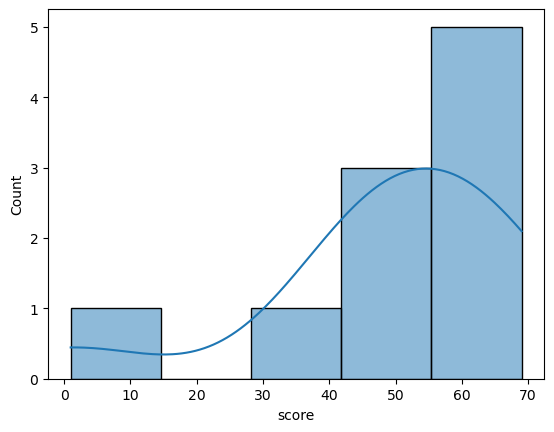

In [27]:
#평균값 < 중앙값

scores_df_a = scores_df.copy()
scores_df_a.iloc[9,0]=1
sns.histplot(data=scores_df_a,x='score',kde=True)
scores_df_a.describe()

# 극단적으로 작은 수인 1이 들어가면서 평균이 중앙값보다 작아진다. = 분포가 왼쪽으로 치우져진다.
#왼쪽으로 치우진 (skewed left) 분포는 수가 우측에 몰려있고 작은 수가 왼쪽으로 퍼져있다.

In [29]:
#데이터의 산포도 지표
#분산과 표준편차
#편차 (deviation)

mean=np.mean(scores)
print(mean)
print(scores)
deviation=scores-mean #deviation: 편차. 편차의 합은 항상 0이 된다
print(deviation) 

55.0
[42 69 56 41 57 48 65 49 65 58]
[-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]


In [31]:
print(sum(deviation))
print(np.mean(deviation))

#분산: 편차를 제곱한 값의 평균 . (편차의 합이 항상 0이 되기 때문에 자승해준다. 그래서 실제보다 과장됨.)
#표준편차: 분산이 실제보다 과장되므로 √를 씌워준다. (=분산의 제곱근)
#ex)√4=2

0.0
0.0


## 분산 
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산.
    - Numpy는 표본분산, Pandas는 불편분산
    - Pandas에서 표본분산을 계산하려면 var메소드의 인수를 ddof=0 이라고 설정. 불편분산은 ddof=1일때 해당.
[표본분산이 분산을 과소평가하는 이유]
- <font color=blue>분산은 데이터와 평균간의 거리</font>이므로 모평균 간의 거리를 계산:<span style="background-color:#9370DB"> np.sum((fish_data-mu)**2)/N</span> <br>
    호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링 3마리 {1,2,3}.표본평균 2.<br>
    이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가하게 된다. (표준편차를 비교해라)
- 표본 분산보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.
- 불편분산: 편향되지 않게 조절해준다. (과소평가 되는 것을 보완)

In [32]:
#넘파이 - 표본분산

np.mean(deviation**2) #deviation 자승한것의 평균 = 분산

86.0

In [33]:
np.var(scores) #var() : 분산을 계산하는 함수 

86.0

In [34]:
#판다스 - 불편분산
scores_df.var()

score    95.555556
dtype: float64

In [ ]:
#넘파이로 불편분산. 판다스로 표본분산 구할때 ddof를 사용하게 된다.
#넘파이- > 불편분산 : ddof=1
#판다스 -> 표본분산 : ddof=0

In [36]:
#넘파이- > 불편분산 : ddof=1
np.var(scores,ddof=1) #불편분산이 추출 됨

95.55555555555556

In [37]:
#판다스 -> 표본분산 : ddof=0
scores_df.var(ddof=0)

score    86.0
dtype: float64

In [39]:
#표준편차

print(np.sqrt(np.var(scores,ddof=0))) #sqrt: 스퀘어 루트 =루트씌워주는 함수
print(np.std(scores,ddof=0))  #std:표준편차 구하는 식

9.273618495495704
9.273618495495704


In [40]:
#범위와 4분위
#범위 : 가장큰수 - 가장 작은 수

np.max(scores)-np.min(scores)

28

In [41]:
#4분위

scores_Q1=np.percentile(scores,25)  #25% . 1사분위 
scores_Q3=np.percentile(scores,75)  #75%   3사분위
scores_IQR=scores_Q3-scores_Q1
scores_IQR  
#IQR :  IQR(Interquartile Range, 사분위 범위). 데이터가 얼마나 퍼져있는지 보여주는 지표 준 하나
#IQR은 Q3 - Q1로 정의

15.0

In [43]:
pd.Series(scores).describe() #scores를 pandas로 바꿔야 describe 확인 가능. 

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

### 데이터를 정규화하는 이유<br>
서로 다른 변수 간의 스케일 차이를 줄여줌으로써, 변수들이 가지는 중요도를 비교하기 쉬워지며, 모델의 성능을 향상시키는데 도움이 된다.<br>

- 데이터를 정규화하기 위해서는 여러 가지 방법이 있으며, 그 중 가장 일반적인 방법은 표준화(standardization)와 정규화(normalization)입니다.
-<font color=blue> 표준화</font>: 평균이 0, 표준편차가 1이 되도록 스케일을 맞춰주는 것.<span style="background-color:#6A5ACD"> z=(x-mean)/std</span>
- <font color=blue>정규화</font>: 데이터의 범위를 [0,1] 또는 [-1,1]로 맞춰주는 것.<span style="background-color:#6A5ACD">x_norm=(c-min)/(max-min)</span>

In [44]:
#데이터의 정규화 
#서로 다른 변수 간의 스케일 차이를 줄여줌으로써, 변수들이 가지는 중요도를 비교하기 쉽게 만들어 주는 것

print(scores)
print(f'평균: {scores.mean()}, 표준편차:{scores.std().round(4)}')

[42 69 56 41 57 48 65 49 65 58]
평균: 55.0, 표준편차:9.2736


In [46]:
#표준화 

z=(scores-np.mean(scores))/ np.std(scores) #데이터에서 평균을 뺀것을 표준편차로 나눔.
z #평균이 0, 표준편차 1

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [47]:
# 표준화를 거꾸로 
55.0+z*scores.std() #z에 표준편차를 곱해주고 평균을 더해줌

array([42., 69., 56., 41., 57., 48., 65., 49., 65., 58.])

In [72]:
#데이터의 시각화 

english_scores=np.array(df.english) #여기까지는 배열
pd.Series(english_scores).describe() #describe 보기위해 시리즈로 변경

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [73]:
#도수 분포표

freq,_=np.histogram(english_scores,bins=10,range=(0,100))
freq

#최소값이 37이고 최대값이 79이므로 그 사이의 값들만 출력 
#30~40점 구간:2, 40~50점 구간: 8, 50~60점 구간:16, 60~70점 구간: 18, 70~80점 구간:6 개의 데이터가 속한다.



#freq: 각 구간에 속하는 데이터의 개수를 담을 리스트. 
#_: 각 구간의 경계값을 담은 리스트. 이 코드에서 '_'를 사용하지 않으므로 무시한다. 
#hitogram(): 입력으로 받은 리스트를 bins로 나누어 각 구간에 속하는 데이터의 개수를 계산.
#range=(0,100): 데이터 범위를 0~100점으로 제한

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [53]:
#도수분포표 

freq_class=[f'{i}~{i+10}'for i in range(0,100,10)]
#0~90까지 10씩 증가하는 숫자들을 문자열 형태로 변환하여 리스트에 저장.ex)헤당 구간에 0~10이가는 문자열 반환

freq_dist_df=pd.DataFrame({'frequency':freq},index=pd.Index(freq_class,name='class'))
#데이터프레임 생성-이 딕셔너리는 'frequency'라는 이름의 키에 `freq` 리스트를 값으로 저장
# `freq_class` 리스트를 인덱스로 지정하고, 이 인덱스의 이름을 'class'로 지정

print(freq_class,'\n')
print(freq_dist_df)

['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '60~70', '70~80', '80~90', '90~100'] 

        frequency
class            
0~10            0
10~20           0
20~30           0
30~40           2
40~50           8
50~60          16
60~70          18
70~80           6
80~90           0
90~100          0


<AxesSubplot:xlabel='frequency', ylabel='Count'>

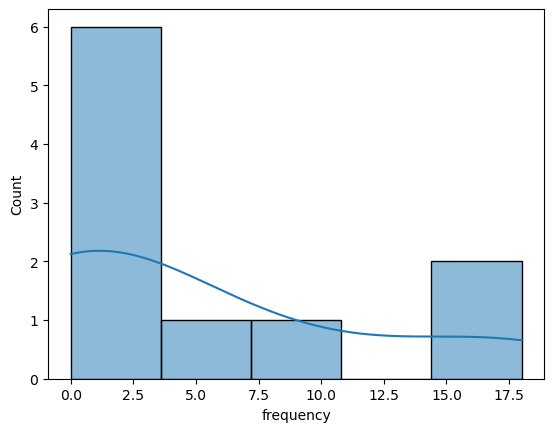

In [54]:
sns.histplot(data=freq_dist_df, x='frequency', kde=True)

In [56]:
#계급값: 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨.
# 0부터 90까지 10씩 증가하는 숫자들의 중심값(class value)을 계산하는 코드

class_value=[(i+(i+10))//2 for i in range(0,100,10)]
#0~90까지 10씩 증가하는 숫자들에 대해 해당 숫자와 그 다음 숫자의 합을 구한다
#ex:0과 10의 중심값은 (0+10)//2 = 5. 10과 20의 중심값은 15이므로, (10+20)//2 = 15
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [57]:
#상대도수 : 해당 계급 데이터의 상대적 비율

rel_freq=freq/freq.sum() 
rel_freq

#freq: 어떤 데이터의 도수분포표에서 각 구간에 속하는 데이터의 빈도수
#freq.sun() : freq리스트의 합. =데이터의 총 빈도수 
#rel_freq : freq / 총빈도수 = 각 구간의 상대도수
#4번 구간의 상대도수가 0.04 이므로 4%가 4번 구간에 속한다는 뜻. 5번 구간은 16%...

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [58]:
#누적 상대도수 : 해당 계급까지의 상대도수의 합. cum_rel_freq = 누계
cum_rel_freq=np.cumsum(rel_freq)
cum_rel_freq


#rel_freq : 도수분포표에서 각 구간의 상대도수를 나타내는 리스트
#np.cumsum() : 리스트의 누적합을 구한다. 
#이 누적 상대도수는 각 구간 이하의 상대도수의 합.
#ex1) 1번~5번구간의 누적 상대도수 = 0.04+0.16=0.20 이므로 데이터중 20%가 4번부터 5번 구간 까지에 속한다.
#ex2) 1번~6번까지의 누적 상대도수= 0.04+0.16+0.32 = 0.52 데이터중 52%가 1번~6번 구간 까지에 속한다. 

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [60]:
#각 구간의 계급값, 도수, 상대도수, 누적 상대도수를 계산하는 코드

freq_dist_df['class_value']= class_value  #class_value: 각 구간의 계급값
#freq_dist_df: 도수분포표 df. / freq_dist_df['']: 컬럼명

freq_dist_df['relative_frequency']=rel_freq #rel_freq: 각 구간의 상대도수

freq_dist_df['cumulative_frequency']=cum_rel_freq #cum_rel_freq : 각 구간까지의 누정 상대도수
freq_dist_df=freq_dist_df[['class_value','frequency','relative_frequency','cumulative_frequency']]
#특정 열만 선택하여 데이터프레임 재구성 
freq_dist_df
#ex)30~40구간의 계급값 35, 도수 2, 상대도수 0.04, 누적상대도수 0.04 가 된다. 


#각 구간은 계급값,   도수,       상대도수,     누적 상대도수

,class_value,frequency,relative_frequency,cumulative_frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [62]:
#위 그래프의 최빈값 구하기.
#도수가 가장 큰 구간의 계급을 찾는 코드.

freq_dist_df.loc[freq_dist_df.frequency.idxmax(),'class_value']

#idxmax() : 데이터프레임에서 가장 큰 값을 가진 인덱스 반환= frequency열에서  가장 큰 값의 인덱스 반환
#loc[]: 행과 열을 선택할 때 사용 ->여기서는 idxmax()가 반환한 인덱스에 해당하는 행을 선택
#class_velue 선택 이유: 도수가 가장 큰 구간의 계급값을 찾아서 반환한다. =가장 큰 도수(18)의 계급값 (65) 

65

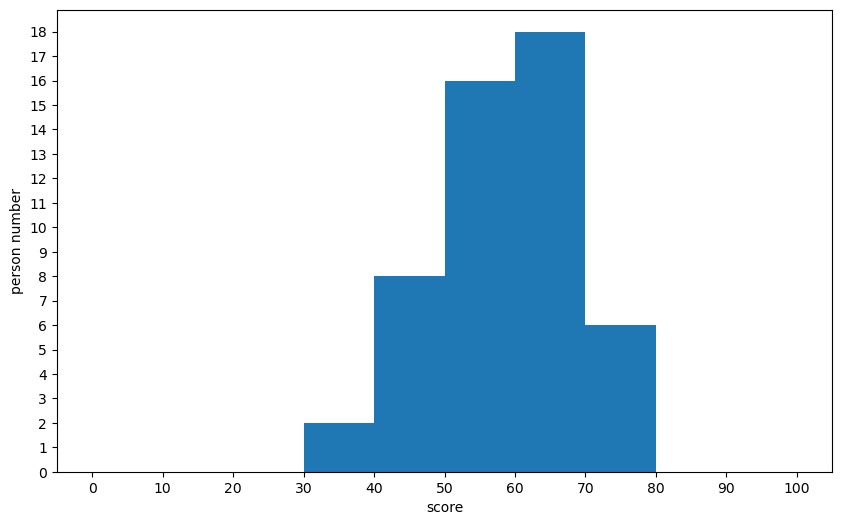

In [75]:
★여기부터 필기 하기

#히스토그램: 도수분포표를 막대그래프로 표현 (클래스가 x축, 각 구간의 빈도가 y)
#어떤 한 컬럼에 대해 히스토그램을 그리는 것과 같다.

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

freq,_,_= plt.hist(english_scores,bins=10, range=(0,100))
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0,100,10+1)) #xticks 눈금 구하기
plt.yticks(np.arange(0,freq.max()+1))
plt.show()

(array([ 0.,  0.,  0.,  2.,  8., 16., 18.,  6.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

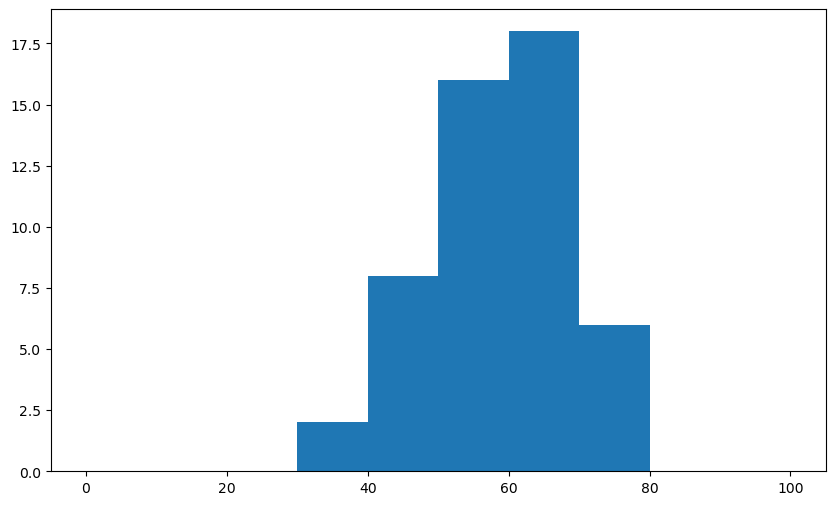

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(english_scores, bins=10, range=(0,100))

### 과제1
클래스별 빈도를 나타내는 히스토그램을 추가하여 누적 상대도수 (y축 왼쪽)을 꺾은 선 그래프로 표현하세요.

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.06 0.06 0.06 0.14
 0.16 0.12 0.2  0.1  0.04 0.02 0.   0.   0.   0.   0.  ]


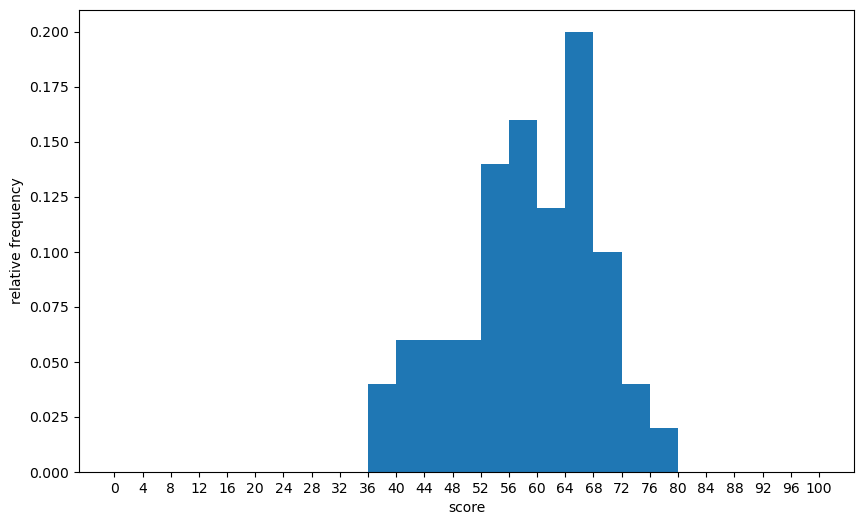

In [78]:
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)

weights=np.ones_like(english_scores) / len(english_scores)
rel_freq,_,_ = ax1.hist(english_scores,bins=25,
                       range=(0,100),weights=weights)

print(rel_freq)
ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))
plt.show()

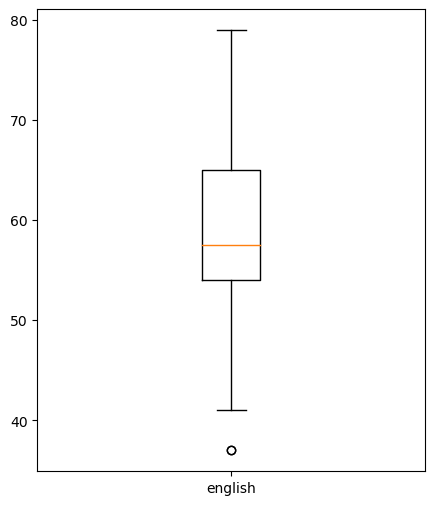

In [80]:
#box plot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(5,6))
plt.boxplot(english_scores,labels=['english'])
plt.show()

In [81]:
english_scores=np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

### [과제2]
타이타닉 데이터셋에서 age,pclass,fare,sex,embarked 컬럼 중 2개를 선택하여 컬럼의 특징을 설명하고 종속변수인 survived와의 관계를 기술하세요.

- 각 컬럼에 대한 전처리 후 기초통계량 (연속형인 경우 해당. 범주형일 경우에는 다른방법 모색할것),
- 시각화를 통한 분포 및 특징 탐색. 이상치 여부 탐색
- 선택한 컬럼을 가장 잘 활용할 수 있는 형태로 변환

nulㅣ처리->이상치 탐색 ->박스플롯과 히스토플랏 보고 유난히 튀는 이상치는 삭제 가능. <br>
통계적으로 나온다고 해서 무조건 이상치라고 보면 안됨. 이상치는 에러가 있을 경우.  <br>
나이에서 이상치가 나올경우 어린사람이 밀집되어있다보니 고령자가 이상치로 인식될 수 있다.
현대그룹 회장의 급여가 현대그룹 인건비에 섞여있으면 이상치로 인식 된다.
하지만 이상치가 아니다. 